# Wave Equation and D'Alembert's solution
Consider the wave equation on an infinite domain
\begin{align}
	u_{tt}(x,t) = c^2 u_{xx}(x,t), -\infty<x<\infty, t>0,
\end{align}
with IC
\begin{align}
	u(x,0) &= f(x),\\
	u_t(x,0) &= g(x).
\end{align}

The solution is given by D'Alembert:
\begin{align}
	u(x,t) = \frac{1}{2}\left(f(x+ct)+f(x-ct)\right) + \frac{1}{2c}\int_{x-ct}^{x+ct}g(x')\, dx'
\end{align}

We will visualise the solution for block pulses in $f$ and $g$ separately.

So first we let
\begin{align}
	f(x) &= H(x+h)-H(x-h),\\
    g(x) &= 0,
\end{align}
where $H$ is the Heaviside step function. We plot the solution.

(100, 80)


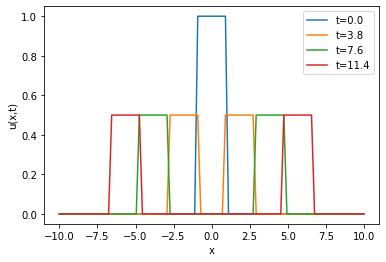

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, h):
    return np.heaviside(x+h,0.5)-np.heaviside(x-h,0.5)

h = 1
c = 0.5
x = np.linspace(-10, 10, 100).reshape((100,1))
t = np.linspace(0, 15, 80).reshape((1,80))
u = 0.5*(f(x+c*t,h)+f(x-c*t,h))
print(u.shape)
plt.figure(1)
for i in [0,20,40,60]:
    plt.plot(x, u[:,i], label='t='+str(np.round(t[0,i],1)))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()



We see the initial condition (a block) break in two and travel in both directions.

Next let
\begin{align}
	f(x) &= 0,\\
    g(x) &= H(x+h)-H(x-h),
\end{align}
where $H$ is the Heaviside step function.

(300, 100)


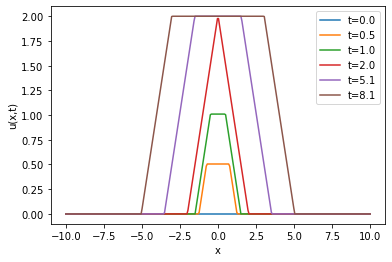

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def prim_g(x, h):
    g = np.zeros(x.shape)
    g[np.where(x<-h)]=0
    g[np.where((x>-h) & (x<h))]=x[np.where((x>-h) & (x<h))]+h
    g[np.where(x>h)]=2*h
    return g

h = 1
c = 0.5
x = np.linspace(-10, 10, 300).reshape((300,1))
t = np.linspace(0, 10, 100).reshape((1,100))
u = 1/(2*c)*(prim_g(x+c*t,h)-prim_g(x-c*t,h))
print(u.shape)
plt.figure(1)
for i in [0, 5, 10,20,50,80]:
    plt.plot(x, u[:,i], label='t='+str(np.round(t[0,i],1)))
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()

Observe the solution closely. For $t<h/c$ (i.e. $t<2$), we see the solution grows in amplitude and expands. At $t=2$, the maximum amplitude is attained. For $t>2$, the solution only expands. Also note that the solution consists of horizontal plateaus connected with linearly sloping solutions. Draw the characteristics yourself (i.e. (x,t)-plane, see exercise 12.3.5) and/or work out the D'Alembert solution for this particular $g(x)$. Use this to identify where the linearly sloping solutions occur in the (x,t)-plane. 